# Spider Silk (MaSp2) Strain Design

Design *E.coli BL21(DE3)* cells to produce the MaSp2 spider silk protein [1,2].

Set the environment

In [1]:
from cameo import models
from cameo.strain_design import pathway_prediction
from cobrapy_bigg_client import client
import pandas as pd
pd.set_option('display.max_rows', 1000)

## Load the *E.coli BL21(DE3)* model 'iECD_1391'

In [2]:
model_orig = client.download_model('iECD_1391', save=False) # BL21(DE3) E.coli model
model = model_orig.copy()

Set parameter Username
Academic license - for non-commercial use only - expires 2022-10-10
Read LP format model from file C:\Users\hinton\AppData\Local\Temp\tmp3jtsd_51.lp
Reading time = 0.02 seconds
: 1943 rows, 5482 columns, 21200 nonzeros


Review the model summary of the *E.coli BL21(DE3)* model

In [3]:
model

<Model iECD_1391 at 0x214643c3910>

## Create and print the new MaSp2 reaction. 

Assume the quadrupled amino acid sequence,

KLHMTGPGQQGPGGYGPGQQGPSGPGSAAAAAAAAGPGQQGPGGYGPGQQGPGGYGPGQQGPSGPGSAAAAAAAAGPGGYGPGQQGPGGYGPGQQGPGGYGPGQQGPSGPG

SAAAAAAAAGPGQQGPGGYGPGQQGPGGYGPGQQGPSGPGSAAAAAAAAGPGQQGPGGYGPGQQGPSGPGSAAAAAAAAGPGQQGPGGYGPGQQGPGGYGPGQQGPSGPGS

AAAAAAAAGPGGYGPGQQGPGGYGPGQQGPGGYGPGQQGPSGPGSAAAAAAAAGPGQQGPGGYGPGQQGPGGYGPGQQGPSGPGSAAAAAAAAGPGQQGPGGYGPGQQGPS

GPGSAAAAAAAASGGDKLHMTGPGQQGPGGYGPGQQGPSGPGSAAAAAAAAGPGQQGPGGYGPGQQGPGGYGPGQQGPSGPGSAAAAAAAAGPGGYGPGQQGPGGYGPGQQ

GPGGYGPGQQGPSGPGSAAAAAAAAGPGQQGPGGYGPGQQGPGGYGPGQQGPSGPGSAAAAAAAAGPGQQGPGGYGPGQQGPSGPGSAAAAAAAAGPGQQGPGGYGPGQQG

PGGYGPGQQGPSGPGSAAAAAAAAGPGGYGPGQQGPGGYGPGQQGPGGYGPGQQGPSGPGSAAAAAAAAGPGQQGPGGYGPGQQGPGGYGPGQQGPSGPGSAAAAAAAAGP

GQQGPGGYGPGQQGPSGPGSAAAAAAAASGGDKLHMTGPGQQGPGGYGPGQQGPSGPGSAAAAAAAAGPGQQGPGGYGPGQQGPGGYGPGQQGPSGPGSAAAAAAAAGPGG

YGPGQQGPGGYGPGQQGPGGYGPGQQGPSGPGSAAAAAAAAGPGQQGPGGYGPGQQGPGGYGPGQQGPSGPGSAAAAAAAAGPGQQGPGGYGPGQQGPSGPGSAAAAAAAA

GPGQQGPGGYGPGQQGPGGYGPGQQGPSGPGSAAAAAAAAGPGGYGPGQQGPGGYGPGQQGPGGYGPGQQGPSGPGSAAAAAAAAGPGQQGPGGYGPGQQGPGGYGPGQQG

PSGPGSAAAAAAAAGPGQQGPGGYGPGQQGPSGPGSAAAAAAAASGGDKLHMTGPGQQGPGGYGPGQQGPSGPGSAAAAAAAAGPGQQGPGGYGPGQQGPGGYGPGQQGPS

GPGSAAAAAAAAGPGGYGPGQQGPGGYGPGQQGPGGYGPGQQGPSGPGSAAAAAAAAGPGQQGPGGYGPGQQGPGGYGPGQQGPSGPGSAAAAAAAAGPGQQGPGGYGPGQ

QGPSGPGSAAAAAAAAGPGQQGPGGYGPGQQGPGGYGPGQQGPSGPGSAAAAAAAAGPGGYGPGQQGPGGYGPGQQGPGGYGPGQQGPSGPGSAAAAAAAAGPGQQGPGGY

GPGQQGPGGYGPGQQGPSGPGSAAAAAAAAGPGQQGPGGYGPGQQGPSGPGSAAAAAAAASGGD


with the MaSp2 spider silk COBRA reaction (1396 * 4.306 = 6011.12)

- 288.0 ala__L_c + 4.0 asp__L_c + 6011.12 atp_c + 192.0 gln__L_c + 512.0 gly_c + 6011.12 h2o_c + 4.0 his__L_c + 4.0 lys__L_c + 4.0 met__L_c + 236.0 pro__L_c + 76.0 ser__L_c + 4.0 thr__L_c + 68.0 tyr__L_c --> 6011.12 adp_c + 6011.12 h_c + masp2_c + 6011.12 pi_c

## Create the COBRA MaSp2 reaction

In [4]:
from cobra import Model, Reaction, Metabolite

new_reaction = Reaction('MaSp2') # New reaction ID
new_reaction.name = 'Spider Silk MaSp2' # New reaction name
new_reaction.subsystem = 'Plasmid' # New reaction subsystem
new_reaction.lower_bound = 0.  # New reaction default lower bound
new_reaction.upper_bound = 1000.  # New reaction default upper bound

# Create the metabolites to be used in the new reaction by using the metabolite data from the existing model
ala__L_c = model.metabolites.ala__L_c
asp__L_c = model.metabolites.asp__L_c
gln__L_c = model.metabolites.gln__L_c
gly_c = model.metabolites.gly_c
his__L_c = model.metabolites.his__L_c
lys__L_c = model.metabolites.lys__L_c
met__L_c = model.metabolites.met__L_c
pro__L_c = model.metabolites.pro__L_c
ser__L_c = model.metabolites.ser__L_c
thr__L_c = model.metabolites.thr__L_c
tyr__L_c = model.metabolites.tyr__L_c
atp_c = model.metabolites.atp_c
h2o_c = model.metabolites.h2o_c
adp_c = model.metabolites.adp_c
h_c = model.metabolites.h_c
pi_c = model.metabolites.pi_c

# Create the new metabolite "masp2_c" since it is not found in the existing model
masp2_c = Metabolite(
    'masp2_c',
    formula = 'protein',
    name = 'Spider Silk Protein MaSp2',
    compartment = 'c')

# Add the stochiometry associated with each metabolite for the new reaction
new_reaction.add_metabolites({
    ala__L_c: -288.0,
    asp__L_c: -4.0,
    gln__L_c: -192.0,
    gly_c: -512.0,
    his__L_c: -4.0,
    lys__L_c: -4.0,   
    met__L_c: -4.0,
    pro__L_c: -236.0,
    ser__L_c: -76.0,
    thr__L_c: -4.0,
    tyr__L_c: -68.0,
    atp_c: -6011.12,
    h2o_c: -6011.12,      
    masp2_c: 1.0,
    adp_c: 6011.12,
    h_c: 6011.12,
    pi_c: 6011.12,   
})

# Print the formula for the new reaction
new_reaction.reaction

'288.0 ala__L_c + 4.0 asp__L_c + 6011.12 atp_c + 192.0 gln__L_c + 512.0 gly_c + 6011.12 h2o_c + 4.0 his__L_c + 4.0 lys__L_c + 4.0 met__L_c + 236.0 pro__L_c + 76.0 ser__L_c + 4.0 thr__L_c + 68.0 tyr__L_c --> 6011.12 adp_c + 6011.12 h_c + masp2_c + 6011.12 pi_c'

## Create a new MaSp2 *E.coli* strain

Create a new MaSp2 *E.coli* strain by adding the new reaction to the orginal BL21(DE3) model.

In [5]:
model_masp2 = model_orig.copy()
model_masp2.add_reaction(new_reaction)

Read LP format model from file C:\Users\hinton\AppData\Local\Temp\tmpxj5zbs5g.lp
Reading time = 0.02 seconds
: 1943 rows, 5482 columns, 21200 nonzeros


## Verifying the attributes of the MaSp2 reaction in the new strain

In [6]:
model_masp2.reactions.MaSp2

<Reaction MaSp2 at 0x21412eeb2e0>

## Verifying the attributes of the masp2_c metabolites in the new strain

In [7]:
model_masp2.metabolites.masp2_c

<Metabolite masp2_c at 0x21412eeb340>

Looking at the model summary to see if the new reaction has been added

In [8]:
model_masp2

<Model iECD_1391 at 0x21412ec5760>

## Create a demand reaction for the masp2_c metabolite

To make sure there is a path for the spider silk protein to leave the cell, we need to create a demand reaction for the masp2_c metabolite

In [9]:
model_masp2.add_boundary(model_masp2.metabolites.get_by_id("masp2_c"), type="demand")

<Reaction DM_masp2_c at 0x21415a61730>

Looking at the model's reactions to see if the new reactions have been added (new reactiona are appended onto the other reactions).

In [10]:
model_masp2.reactions[2740:]

[<Reaction 4HTHRK at 0x21413395220>,
 <Reaction MaSp2 at 0x21412eeb2e0>,
 <Reaction DM_masp2_c at 0x21415a61730>]

We can see that the two reactions have been added to the new strain model!

## Save the MaSp2 mutant model

Save the new MaSp2 *E.coli* strain to a separate file and create a back-up model for later work.

In [11]:
import cobra.test
cobra.io.save_json_model(model_masp2, "iECD_1391_MaSp2.json")
model_save = model_masp2.copy()

Read LP format model from file C:\Users\hinton\AppData\Local\Temp\tmp23twolxp.lp
Reading time = 0.02 seconds
: 1944 rows, 5486 columns, 21236 nonzeros


## Look at the MaSp2 mutant model for masp2_c secretion

In [12]:
model_masp2.summary()

No spider silk production under default conditions!

## Plot the production envelope of the new MaSp2 strain

In [13]:
from cameo import phenotypic_phase_plane
from cameo.visualization.plotting.with_plotly import PlotlyPlotter
plotter = PlotlyPlotter()

solution_masp2_fluxes = model_masp2.optimize()
solution_masp2 = solution_masp2_fluxes.fluxes.DM_masp2_c
solution_pFBA_fluxes = cobra.flux_analysis.pfba(model_masp2)
solution_pFBA = solution_pFBA_fluxes.fluxes.DM_masp2_c

growth_masp2 = solution_masp2_fluxes.fluxes.BIOMASS_Ec_iJO1366_core_53p95M
growth_pFBA = solution_pFBA_fluxes.fluxes.BIOMASS_Ec_iJO1366_core_53p95M

print('FBA Analysis:  ',growth_masp2, solution_masp2, '   pFBA Analysis:   ',growth_pFBA, solution_pFBA )

production_envelope = phenotypic_phase_plane(model_masp2, 
                                             variables=[model_masp2.reactions.BIOMASS_Ec_iJO1366_core_53p95M], 
                                             objective=model_masp2.reactions.DM_masp2_c)

production_envelope.plot(plotter, points=[(growth_masp2, solution_masp2),
                                          (growth_pFBA, solution_pFBA)], points_colors=["red","blue"])

FBA Analysis:   0.9756145115851274 0.0    pFBA Analysis:    0.9756145115851274 0.0


This represents the maximum capacity of the BL21(DE3) cells under the default conditions. The amount actually produced will depend on the strength of the plasmid characteristics and the regulatory structure of the cells. In principle the cell should be able to provide the resources necessary to product the maximum shown in the upper left corner of the production envelope. This can be improved by adding more carbon sources and other key amino acids.

## Determine the maximum theoretical production of MaSp2

The maximum production of masp2_c can be found by

In [14]:
model_test = model_save.copy()
model_test.objective = 'DM_masp2_c'
solution_test = model_test.optimize()
solution_test.fluxes.DM_masp2_c

Read LP format model from file C:\Users\hinton\AppData\Local\Temp\tmphwq3oke6.lp
Reading time = 0.03 seconds
: 1944 rows, 5486 columns, 21236 nonzeros


0.008898142757745711

Thus the maximum theortical production for this new strain under default conditions is 0.0089 mmol/gDW-hr. Assuming a molecular weight of the masp2_c protein to be 118 kDa or 118,000 mg/mmol. Thus,

       Protein total (mg/gDW*hr) = Flux-rate (mmol/gDw*hr) x Molecular weight (mg/mmol) x 1 (hr)
   
       Protein total (mg/gDW*hr) = 0.0089 (mmol/gDw*hr) x 118,000 (mg/mmol) x 1 (hr)
   
       Protein total (mg) = 1050.2 mg/gDW or 1.05 g/gDW
       
Thus, at maximum capacity using the default conditions of the MaSp2 model can produce over 1 gram of MaSp2 spider silk per gram of dry weight biomass. This might be possible if all the spider silk could be secreted from the cell but not possible if the spider silk is to remain in the cell for later proccessing. 

The maximum protein that can be stored in a cell is appoximately 550 mg/gDW. So what is the maximum spider silk flux that can be produced per hour if we assume half of the protein maximum (275 mg/gDW).

    Maximum flux-rate (mmol/gDW*hr) = Max Protein (mg/gDW) / Molecular Weight (mg/mmol) x 1 (hr)
    
    Maximum flux-rate (mmol/gDW*hr) = 275 (mg/gDW) / (118,000 (mg/mmol) x 1 (hr))
    
    Maximum flux-rate (mmol/gDW*hr) =  0.00233 (mmol/gDW*hr)   
    
## Plot a new production envelope of the new strain showing maximum production rate

Where is this on the production envelope? The blue dot is the default operating point for the new strain. The red dot shows the maximum production rate for none secreted bioproduct.

In [15]:
# Create a new model that includes the plasmid
model_plasmid = model_save.copy()
model_plasmid.reactions.DM_masp2_c.bounds = 0.00233,1000 # 0.00233 (mmol/gDW*hr) at zero growth-rate
solution_plasmid = model_plasmid.optimize()

# Set the cell to produce 0.00233 mmol/gDW-hr and then find the growth rate at that production level
maximum_flux_rate = solution_plasmid.fluxes.DM_masp2_c 
growth_rate_at_maximum = solution_plasmid.fluxes.BIOMASS_Ec_iJO1366_core_53p95M

# Plot the production envelope
production_envelope = phenotypic_phase_plane(model_masp2, 
                                             variables=[model_masp2.reactions.BIOMASS_Ec_iJO1366_core_53p95M], 
                                             objective=model_masp2.reactions.DM_masp2_c)

production_envelope.plot(plotter, points=[(growth_masp2, solution_masp2),
                                          (growth_rate_at_maximum, maximum_flux_rate)], 
                                           points_colors=["blue","red"])

Read LP format model from file C:\Users\hinton\AppData\Local\Temp\tmp_spft96e.lp
Reading time = 0.02 seconds
: 1944 rows, 5486 columns, 21236 nonzeros


In this non-secreting case, what is the maximum spider silk that can be produced"

       Protein total (mg/gDW*hr) = 0.00233 (mmol/gDw*hr) x 118,000 (mg/mmol) x 1 (hr)
       
       Protein total (mg) = 274.94 mg/gDW or 0.27495 g/gDW     
       
This is what we predicted; half of the 550 mg/gDW.

If we assume that we can grow this strain to an optical density of 100, and the cells have operated at the rate of 275 mg/gDW then it should theoretically produce a maximum of 275 mg/gDW x 47 gDW/L = 12,925 mg/L or 12.925 g/L [3]. In moles this would be 12.925 g/L / 118 g/mol = 0.1095 mol/L.

## Produced MaSp2 spider silk protein

MaSp2 produced by Professor Justin Jones and Professor Randy Lewis. 

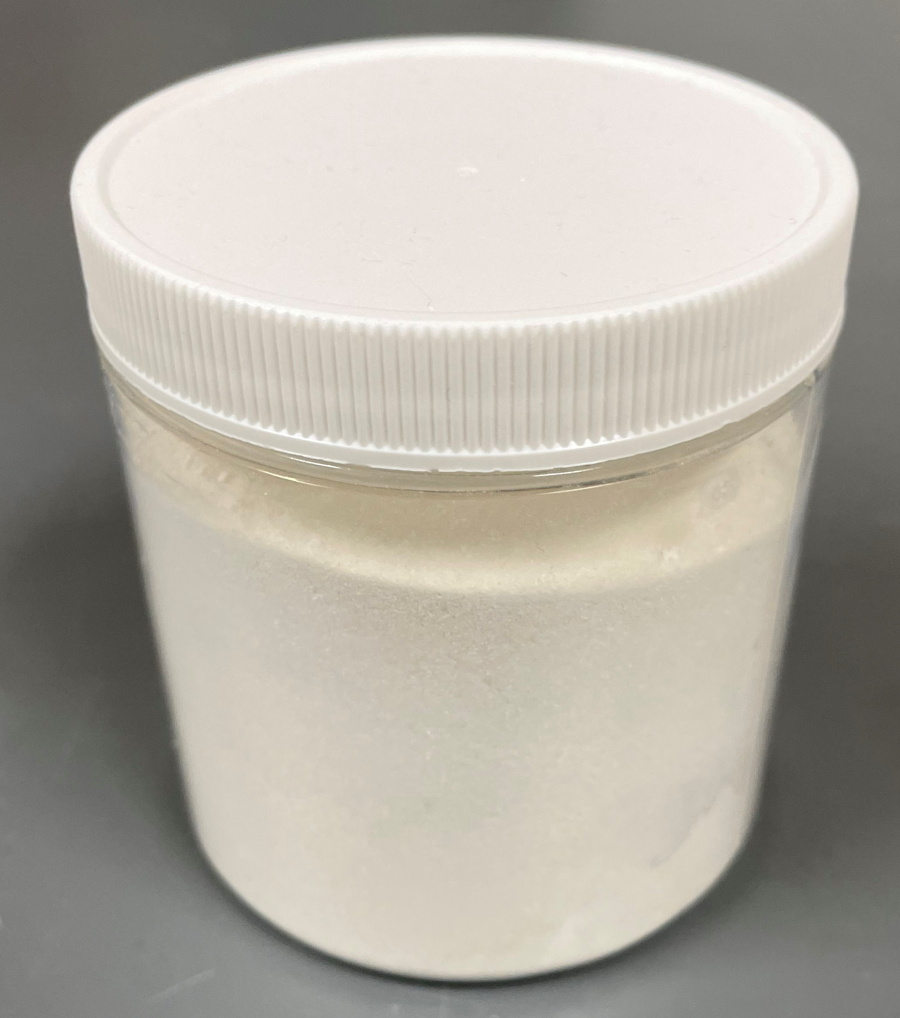

The maximum that they have been able to produce is 1 g/L.

## References

1. Lewis, Randolph V., et al. "Expression and purification of a spider silk protein: a new strategy for producing repetitive proteins." Protein expression and purification 7.4 (1996): 400-406.
2. Lewis, Randolph V. "Spider silk: ancient ideas for new biomaterials." Chemical reviews 106.9 (2006): 3762-3774
3. https://bionumbers.hms.harvard.edu/bionumber.aspx?s=n&v=8&id=107924